# Data Visualisation


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df = df[['Survived','Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df = df.dropna(axis=0, how='any')

In [8]:
# df.describe()
y = df['Survived']

In [9]:
X = df[['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [10]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [11]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,1.000000,20.000000,0.000000,0.000000,8.050000
50%,2.000000,28.000000,0.000000,0.000000,15.645850
75%,3.000000,38.000000,1.000000,1.000000,33.000000
max,3.000000,80.000000,5.000000,6.000000,512.329200


In [12]:
from sklearn.preprocessing import LabelEncoder
X = np.array(X)

In [13]:
le_1 = LabelEncoder()

In [14]:
X[:, 1] = le_1.fit_transform(X[:, 1])

In [15]:
le_2 = LabelEncoder()
X[:, 6] = le_2.fit_transform(X[:, 6])

In [16]:
X = pd.DataFrame(data=X, columns=['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
sc = StandardScaler()

In [20]:
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [21]:
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## Evaluation Function

In [22]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
def print_score(clf, X_train, X_test, y_train, y_test, train = True):
#     print accuracy score, classification report, confusion metrics
    if train:
#         training performance
        print('Train Result : \n')
        print('Accuracy Score {0:.4f}\n'.format(accuracy_score(y_train, clf.predict(X_train))))
        print('Classification Report : \n {} \n'.format(classification_report(y_train, clf.predict(X_train))))
        print('Confusion Metrics : \n {} \n'.format(confusion_matrix(y_train, clf.predict(X_train))))
        
        res = cross_val_score(clf, X_train, y_train, cv = 10, scoring='accuracy')
        print('Average Accuracy : {0:.4f}\n'.format(np.mean(res)))
        print('Accuracy SD : {0:.4f}\n'.format(np.std(res)))
        
    elif train == False:
#         test performance
        print('Test Result : \n')
        print('Accuracy Score {0:.4f}\n'.format(accuracy_score(y_test, clf.predict(X_test))))
        print('Classification Report : \n {}\n'.format(classification_report(y_test, clf.predict(X_test))))
        print('Confusion Metrics : \n {} \n'.format(confusion_matrix(y_test, clf.predict(X_test))))


## Selecting Important features

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
clf = DecisionTreeClassifier(min_samples_split= 20)

In [51]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [52]:
clf.feature_importances_

array([0.18718208, 0.45466095, 0.18127807, 0.00901596, 0.01494529,
       0.15291764, 0.        ])

In [53]:
result = pd.DataFrame(clf.feature_importances_, X.columns)
result.columns = ['features']
result.sort_values(by='features', ascending=False)

,features
Sex,0.454661
Pclass,0.187182
Age,0.181278
Fare,0.152918
Parch,0.014945
SibSp,0.009016
Embarked,0.000000


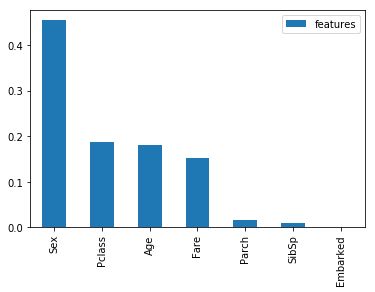

In [54]:
result.sort_values(by='features', ascending=False).plot(kind='bar');

In [55]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result : 

Accuracy Score 0.8893

Classification Report : 
              precision    recall  f1-score   support

          0       0.88      0.95      0.91       344
          1       0.91      0.80      0.85       225

avg / total       0.89      0.89      0.89       569
 

Confusion Metrics : 
 [[327  17]
 [ 46 179]] 

Average Accuracy : 0.7702

Accuracy SD : 0.0464

Test Result : 

Accuracy Score 0.7273

Classification Report : 
              precision    recall  f1-score   support

          0       0.72      0.85      0.78        80
          1       0.75      0.57      0.65        63

avg / total       0.73      0.73      0.72       143


Confusion Metrics : 
 [[68 12]
 [27 36]] 



## Using Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
clf = RandomForestClassifier()

In [58]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [59]:
result = pd.DataFrame(clf.feature_importances_, X.columns)
result.columns = ['features']
result.sort_values(by='features', ascending=False)

,features
Age,0.286291
Sex,0.259476
Fare,0.243306
Pclass,0.093958
Parch,0.046198
SibSp,0.044505
Embarked,0.026266


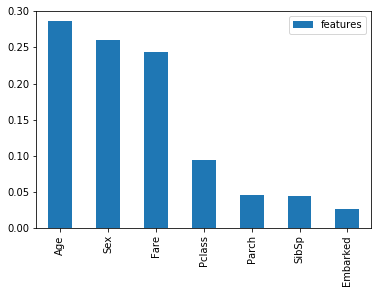

In [60]:
result.sort_values(by='features', ascending=False).plot(kind='bar');

In [61]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result : 

Accuracy Score 0.9666

Classification Report : 
              precision    recall  f1-score   support

          0       0.96      0.99      0.97       344
          1       0.98      0.93      0.96       225

avg / total       0.97      0.97      0.97       569
 

Confusion Metrics : 
 [[340   4]
 [ 15 210]] 

Average Accuracy : 0.7718

Accuracy SD : 0.0401

Test Result : 

Accuracy Score 0.7552

Classification Report : 
              precision    recall  f1-score   support

          0       0.75      0.84      0.79        80
          1       0.76      0.65      0.70        63

avg / total       0.76      0.76      0.75       143


Confusion Metrics : 
 [[67 13]
 [22 41]] 



## Logistic Regeression

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
clf = LogisticRegression()

In [64]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result : 

Accuracy Score 0.8084

Classification Report : 
              precision    recall  f1-score   support

          0       0.83      0.86      0.84       344
          1       0.77      0.73      0.75       225

avg / total       0.81      0.81      0.81       569
 

Confusion Metrics : 
 [[296  48]
 [ 61 164]] 

Average Accuracy : 0.8018

Accuracy SD : 0.0721

Test Result : 

Accuracy Score 0.7972

Classification Report : 
              precision    recall  f1-score   support

          0       0.77      0.91      0.83        80
          1       0.85      0.65      0.74        63

avg / total       0.81      0.80      0.79       143


Confusion Metrics : 
 [[73  7]
 [22 41]] 



## Using SVM

In [72]:
from sklearn.svm import SVC

In [91]:
clf = SVC(C = 2, kernel='rbf', degree=3)

In [92]:
clf.fit(X_train, y_train)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [93]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result : 

Accuracy Score 0.8453

Classification Report : 
              precision    recall  f1-score   support

          0       0.82      0.95      0.88       344
          1       0.91      0.68      0.78       225

avg / total       0.85      0.85      0.84       569
 

Confusion Metrics : 
 [[328  16]
 [ 72 153]] 

Average Accuracy : 0.8121

Accuracy SD : 0.0395

Test Result : 

Accuracy Score 0.8252

Classification Report : 
              precision    recall  f1-score   support

          0       0.80      0.93      0.86        80
          1       0.88      0.70      0.78        63

avg / total       0.83      0.83      0.82       143


Confusion Metrics : 
 [[74  6]
 [19 44]] 



## Using Bagging

In [94]:
from sklearn.ensemble import BaggingClassifier

In [136]:
clf = BaggingClassifier(n_estimators=500, base_estimator=SVC(C = 1, kernel='rbf', degree=3))

In [137]:
clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=500, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [ ]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result : 

Accuracy Score 0.8453

Classification Report : 
              precision    recall  f1-score   support

          0       0.82      0.95      0.88       344
          1       0.91      0.68      0.78       225

avg / total       0.85      0.85      0.84       569
 

Confusion Metrics : 
 [[328  16]
 [ 72 153]] 



## Using AdaBoost

In [123]:
from sklearn.ensemble import AdaBoostClassifier?

In [127]:
clf = AdaBoostClassifier(n_estimators=50)

In [128]:
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [129]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result : 

Accuracy Score 0.8418

Classification Report : 
              precision    recall  f1-score   support

          0       0.86      0.88      0.87       344
          1       0.81      0.78      0.80       225

avg / total       0.84      0.84      0.84       569
 

Confusion Metrics : 
 [[304  40]
 [ 50 175]] 

Average Accuracy : 0.7899

Accuracy SD : 0.0684

Test Result : 

Accuracy Score 0.8252

Classification Report : 
              precision    recall  f1-score   support

          0       0.83      0.86      0.85        80
          1       0.82      0.78      0.80        63

avg / total       0.82      0.83      0.82       143


Confusion Metrics : 
 [[69 11]
 [14 49]] 

